In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("./AB_NYC_2019.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [2]:
data.drop(['id' , 'name' , 'host_name' , 'last_review' ,'reviews_per_month' , 'calculated_host_listings_count' , 'availability_365'] , axis = 1,inplace = True)


<AxesSubplot: xlabel='neighbourhood_group'>

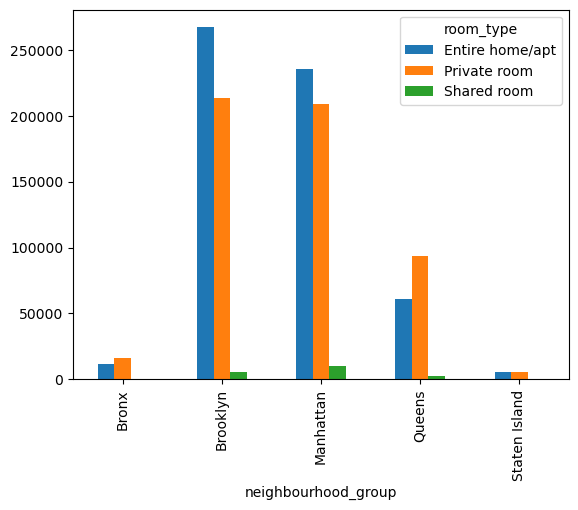

In [3]:
data.pivot_table(values = 'number_of_reviews' , index = 'neighbourhood_group' , columns = 'room_type' , aggfunc = 'sum').plot.bar()

In [4]:
data.pivot_table(values = 'price' , index = 'neighbourhood_group' , columns = 'room_type' , aggfunc = 'mean').plot.bar()

<AxesSubplot: xlabel='neighbourhood_group'>

In [5]:
data.pivot_table(values = 'price' , index = 'neighbourhood_group' , columns = 'room_type' , aggfunc = 'count').plot.bar()

<AxesSubplot: xlabel='neighbourhood_group'>

<AxesSubplot: xlabel='host_id'>

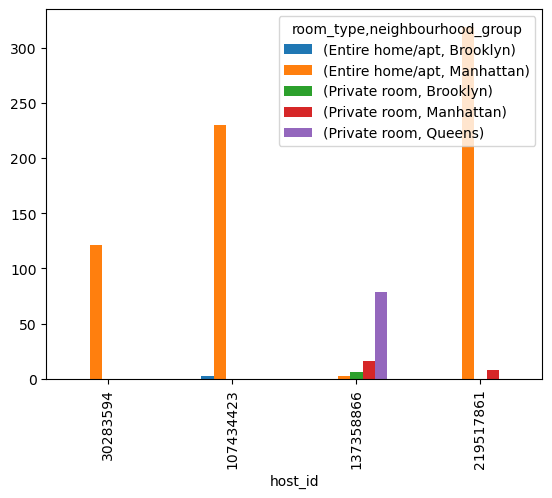

In [8]:
top_host = data.host_id.value_counts().head(4).index
top_host_data = [data.loc[data['host_id'] == top_host[i]] for i in range(4)]
top_host_data = pd.concat(top_host_data)
top_host_data.pivot_table(values = 'price' , index = 'host_id' , columns = ['room_type','neighbourhood_group'] , aggfunc = 'count').plot.bar()